## RANDOM FOREST CLASSIFIER ALGORITHM

In [38]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of Decisiontree models to select out of these for our best fit model
    'max_depth': [None, 10, 20],     # Maximum depth of each tree model
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]       # Whether bootstrap samples are used when building trees
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)   #verbose=2: More detailed output, often showing updates for each fold and each combination of parameters in cross-validation.
#n_jobs=-1: Use all processors for parallel computation.

# Fit the model
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [7]:
# Get the best hyperparameters
print(f"Best Hyperparameters: { grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 94.29%


In [29]:
# Evaluate the best model on test data
best_model = grid_search.best_estimator_  #this will give best fit model out of all cross-validations and this model will have 100 decision trees sub-models in parallel
y_pred_best = best_model.predict(X_test)

# Accuracy of the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {tuned_accuracy * 100:.2f}%")

Tuned Model Accuracy: 100.00%


In [31]:
# Tuned model evaluation
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_best))
print("\nTuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Tuned Model Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


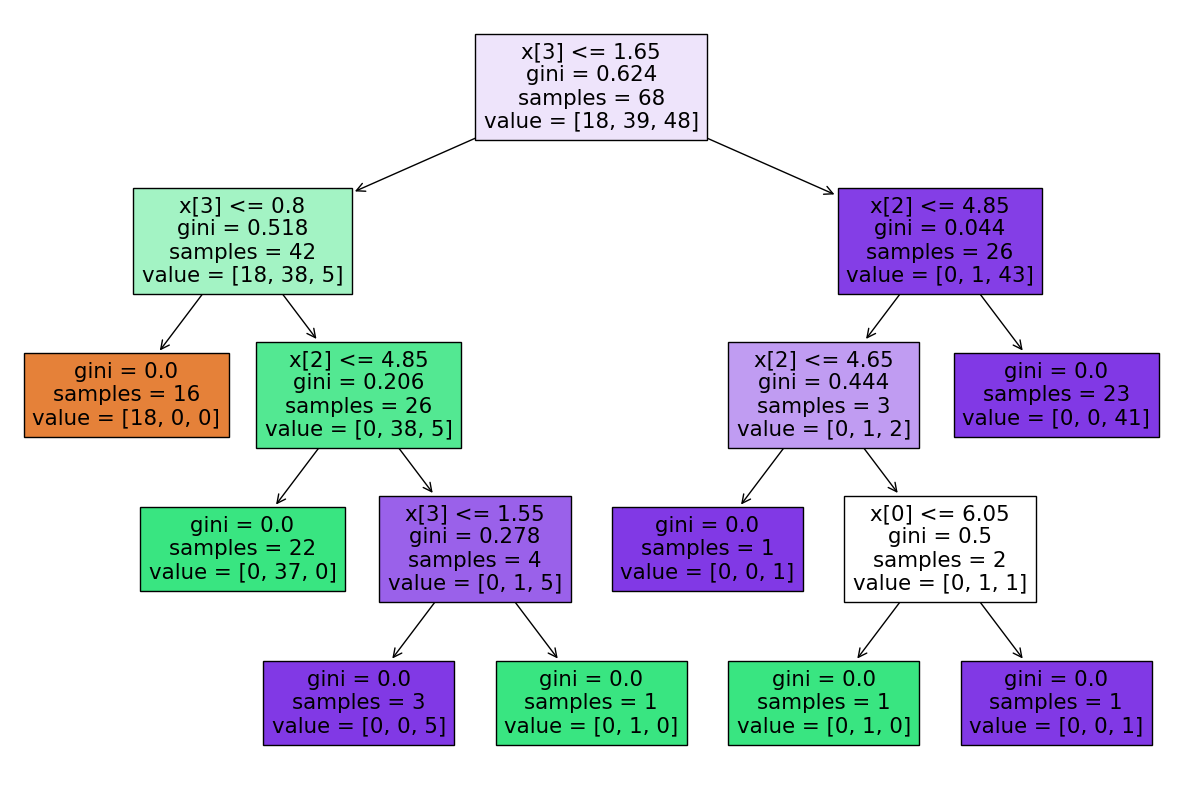

In [33]:
from sklearn import tree #for getting tree structure
import matplotlib.pyplot as plt

# Extract a single Decisiontree sub-model from the random forest Model (e.g., the first tree)
single_tree = grid_search.best_estimator_.estimators_[0] #first sub-model Decision tree (total we have in this n_estimators=100)

# Plot the extracted tree
plt.figure(figsize=(15, 10))
tree.plot_tree(single_tree, filled=True)
plt.show()


In [36]:
'''
Key Parameters in Hyperparameter Tuning:

n_estimators: Number of trees model (higher means better performance but slower computation).
max_depth: Controls overfitting (None means the nodes are expanded until all leaves are pure).
min_samples_split & min_samples_leaf: Control the tree's growth and complexity.
bootstrap: Whether bootstrap samples are used when building trees (affects model diversity).
This implementation is a powerful approach for finding the optimal Random Forest model for classification tasks using grid search to fine-tune its hyperparameters.
'''

"\nKey Parameters in Hyperparameter Tuning:\n\nn_estimators: Number of trees (higher means better performance but slower computation).\nmax_depth: Controls overfitting (None means the nodes are expanded until all leaves are pure).\nmin_samples_split & min_samples_leaf: Control the tree's growth and complexity.\nbootstrap: Whether bootstrap samples are used when building trees (affects model diversity).\nThis implementation is a powerful approach for finding the optimal Random Forest model for classification tasks using grid search to fine-tune its hyperparameters.\n"